# Analyze

Perform some analyzes on dataset.

In [1]:
# Import's

# Manipulation data
import numpy as np
import pandas as pd

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Statistical Analyze

## 1.1 UserList

So let's explore our data in order to find some insights.

In [2]:
# Reading data
userList = pd.read_csv('UserListCleaned.csv')

In [3]:
# Checking dtypes
userList.dtypes

username                     object
user_watching                 int64
user_completed                int64
user_onhold                   int64
user_dropped                  int64
user_plantowatch              int64
user_days_spent_watching    float64
gender                       object
location                     object
join_date                    object
stats_mean_score            float64
stats_rewatched             float64
stats_episodes              float64
age                         float64
dtype: object

In [4]:
# Means of some columns
userList.describe().columns

Index(['user_watching', 'user_completed', 'user_onhold', 'user_dropped',
       'user_plantowatch', 'user_days_spent_watching', 'stats_mean_score',
       'stats_rewatched', 'stats_episodes', 'age'],
      dtype='object')

In [5]:
# Distribution of each numeric columns
numeric_columns = userList.select_dtypes(['int','float']).columns.values

In [6]:
'''

Plot a distplot for each column

Parameters:
-----------
cols: List of columns.
df: Dataframe used to plot.
ncol: Number of columns to use in plot.

'''
def plot_distplot(cols,df,ncol=3):

    # Creating figure
    fig = plt.figure(figsize=(15,15))

    # Computing how many rows we will have for 3 columns
    nrow = int((len(cols)/ncol))+1

    for index,c in enumerate(cols):

        # Add
        ax = fig.add_subplot(nrow,ncol,index+1)

        sns.distplot(df[c],ax=ax)

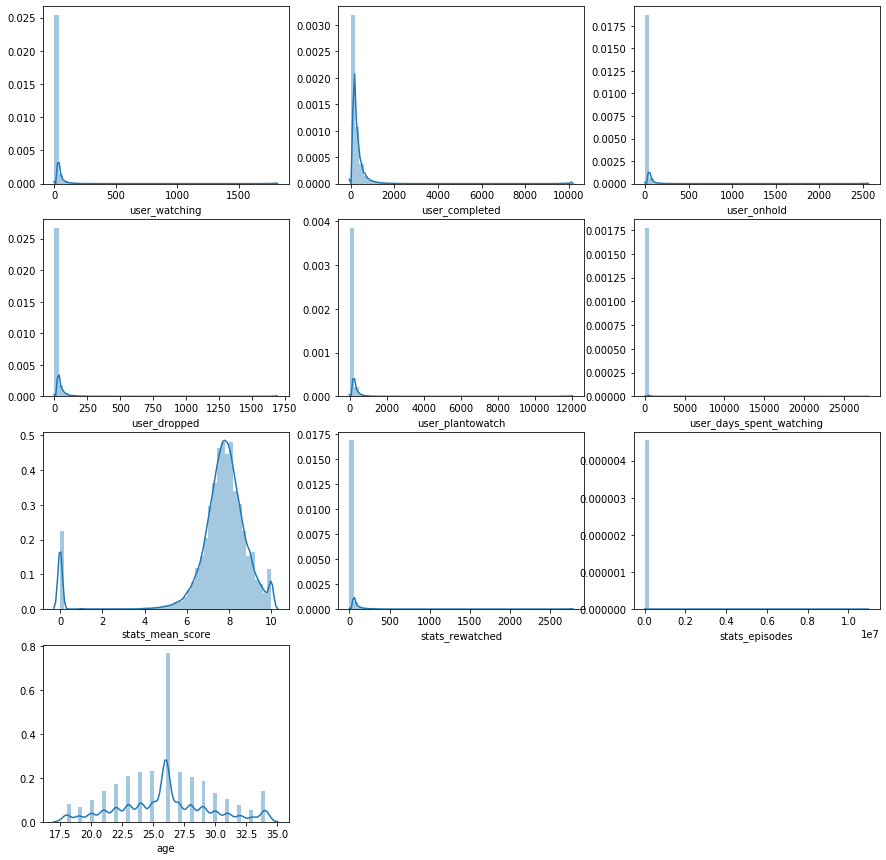

In [7]:
# Plot distplot
plot_distplot(numeric_columns,userList)

In general we have a lot of asymmetric distributions. Most of values are concentraded in zero and we have a lot of big values. I think this mean that in many rows we don't have a lot of information and in other we have wrong information.

In [8]:
'''

Plot a countplot

Parameters:
-----------
x: Column in x axis.
df: Dataframe used to plot.
title: Title of plot.
dx: Distance to add in x axis for percentage.
dy: Distance to add in y axis for percentage.

'''
def plot_countplot(x,df,title,dx,dy):

    # Creting figure
    fig,ax = plt.subplots(figsize=(12,7))

    # Countplot
    sns.countplot(x='gender',data=df,ax=ax)

    # Change xlabel/ylabel size
    ax.set_xlabel(ax.get_xlabel(),size=15)
    ax.set_ylabel(ax.get_ylabel(),size=15)

    # Change xticklabel/yticklabel
    for tick_x in ax.get_xticklabels():
        tick_x.set_fontsize(12)
    for tick_y in ax.get_yticklabels():
        tick_y.set_fontsize(12)

    # Title
    ax.set_title(title,size=15)

    # Number of samples
    total = len(df)

    # Set percentage
    for p in ax.patches:
        # Computing the height/width of text
        height = p.get_height()
        width = p.get_x() + p.get_width()/dx
        ax.text(width,height+dy,'{:1.2f}%'.format(height/total),size=15)

    # Show figure
    plt.show()

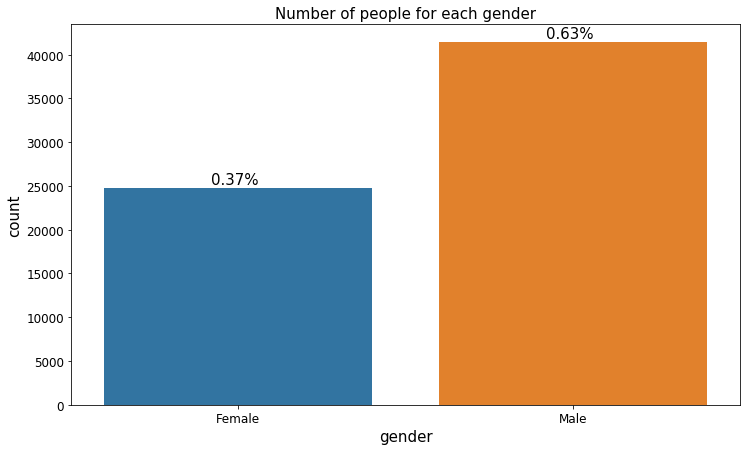

In [9]:
# Countplot
plot_countplot('gender',userList,'Number of people for each gender',2.5,500)

You can see that most people are male in our dataset. Actually it's very common that animes are more popular in this gender.

In [10]:
# Get top 15 most populous countries
location = userList['location'].value_counts().sort_values(ascending=False)[:15]

In [11]:
'''

Plot a barplot

Parameters:
-----------
serie: Serie with categorical values in index and numerical (frequency) values
xlabel/ylabel: Label to use in xlabel/ylabel
title: Title of plot.
dx: Distance to add in x axis for percentage.
dy: Distance to add in y axis for percentage.
percentage: If set percentage or not.

'''
def plot_barplot(serie,xlabel,ylabel,title,dx,dy,percentage=False):

    # Creating figure
    fig,ax = plt.subplots(figsize=(12,7))

    # Barplot
    sns.barplot(x=serie.index,y=serie.values,ax=ax,palette='Blues')

    # Set xlabel/ylabel
    ax.set_xlabel(xlabel,size=15)
    ax.set_ylabel(ylabel,size=15)

    # Set xticklabels/yticklabels
    for xtick in ax.get_xticklabels():
        xtick.set_fontsize(12)
        xtick.set_rotation(45)
    for ytick in ax.get_yticklabels():
        ytick.set_fontsize(12)

    # Total of samples
    total = serie.sum()
    
    if(percentage):
        # Set percentage above bar
        for p in ax.patches:
            height = p.get_height() 
            width = p.get_x() + p.get_width()/dx
            ax.text(width,height+dy,'{:1.2f}%'.format(height/total),size=12)
    else:
        # Set value above bar
        for p in ax.patches:
            height = p.get_height() 
            width = p.get_x() + p.get_width()/dx
            ax.text(width,height+dy,int(height),size=15)
            
    # Title
    ax.set_title(title,size=15)

    # Show figure
    plt.show()

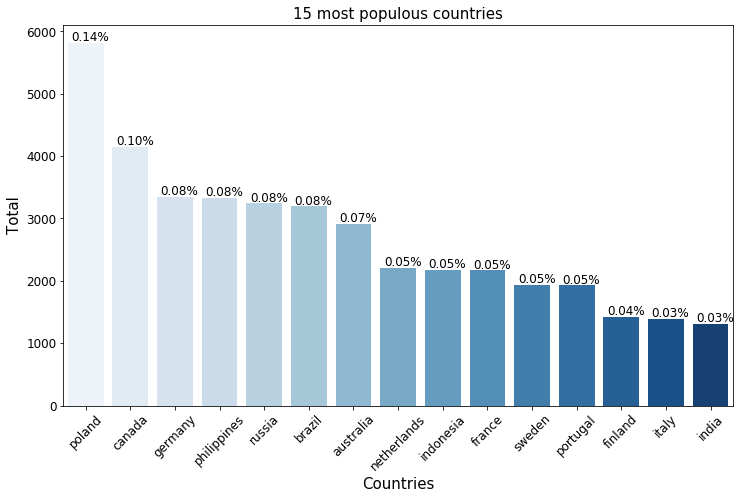

In [12]:
# Barplot
plot_barplot(location,'Countries','Total','15 most populous countries',10,30,percentage=True)

The graph above is very interesting because knowing which countries watch the most anime we can outline strategies to better use the resources of the company. This information could be useful for streaming services, for example.

In [13]:
# Sum of each column by gender
gender = userList.groupby('gender').mean()

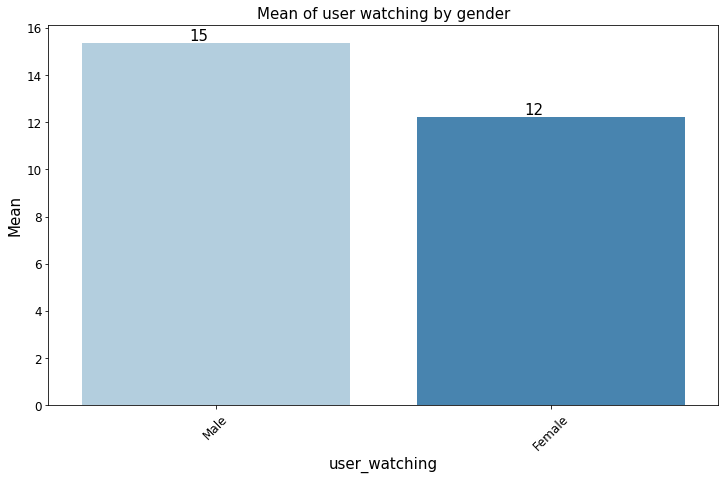

In [14]:
# Creating serie
serie = gender['user_watching'].sort_values(ascending=False)

# Barplot
plot_barplot(serie,'user_watching','Mean','Mean of user watching by gender',dx=2.5,dy=0.1)

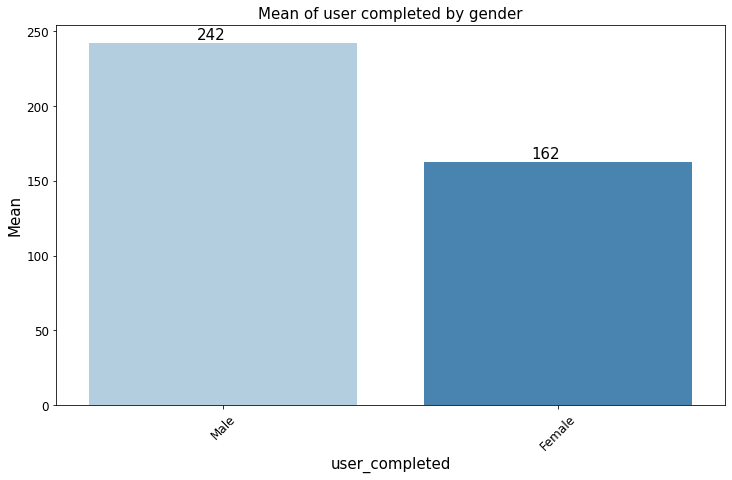

In [15]:
# Creating serie
serie = gender['user_completed'].sort_values(ascending=False)

# Barplot
plot_barplot(serie,'user_completed','Mean','Mean of user completed by gender',dx=2.5,dy=2)

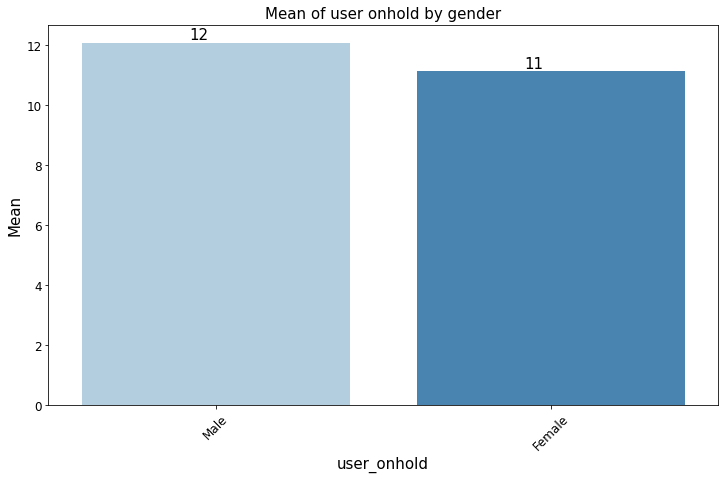

In [16]:
# Creating serie
serie = gender['user_onhold'].sort_values(ascending=False)

# Barplot
plot_barplot(serie,'user_onhold','Mean','Mean of user onhold by gender',dx=2.5,dy=0.1)

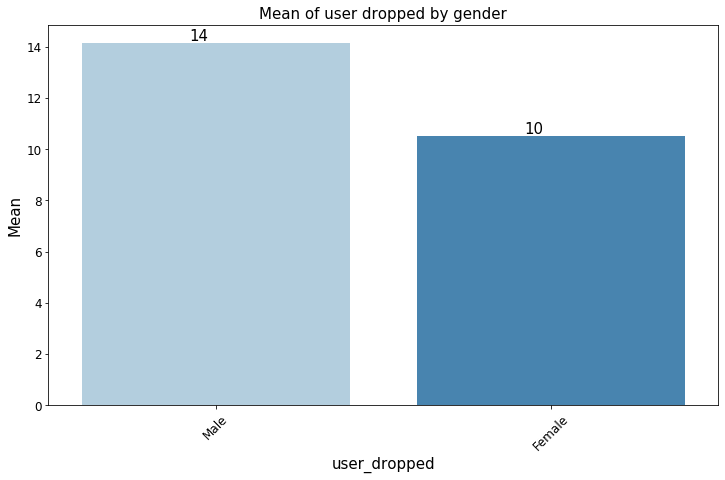

In [17]:
# Creating serie
serie = gender['user_dropped'].sort_values(ascending=False)

# Barplot
plot_barplot(serie,'user_dropped','Mean','Mean of user dropped by gender',dx=2.5,dy=0.1)

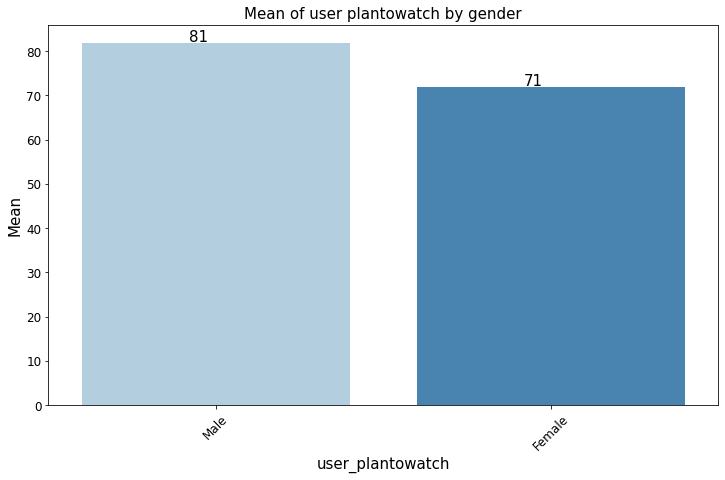

In [18]:
# Creating serie
serie = gender['user_plantowatch'].sort_values(ascending=False)

# Barplot
plot_barplot(serie,'user_plantowatch','Mean','Mean of user plantowatch by gender',dx=2.5,dy=0.2)

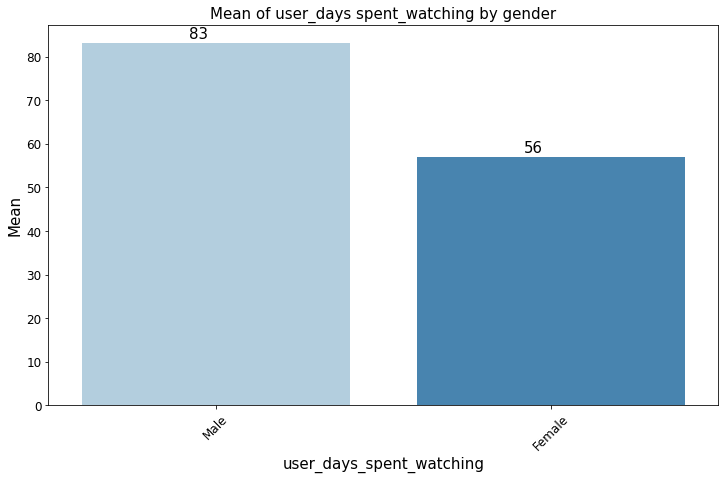

In [19]:
# Creating serie
serie = gender['user_days_spent_watching'].sort_values(ascending=False)

# Barplot
plot_barplot(serie,'user_days_spent_watching','Mean','Mean of user_days spent_watching by gender',dx=2.5,dy=1)

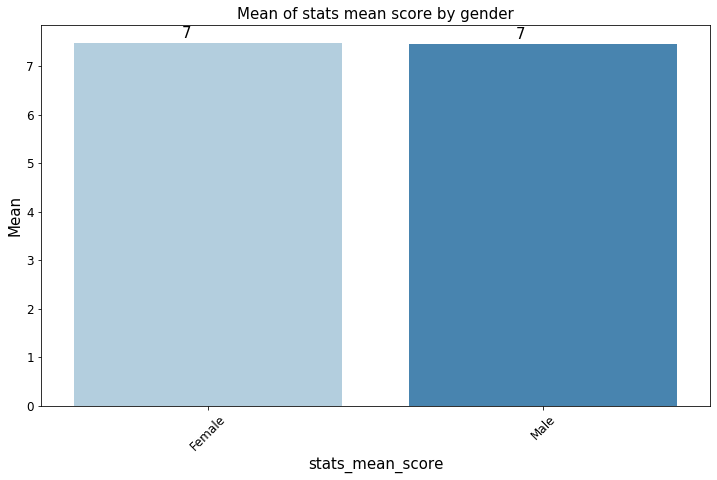

In [20]:
# Creating serie
serie = gender['stats_mean_score'].sort_values(ascending=False)

# Barplot
plot_barplot(serie,'stats_mean_score','Mean','Mean of stats mean score by gender',dx=2.5,dy=0.1)

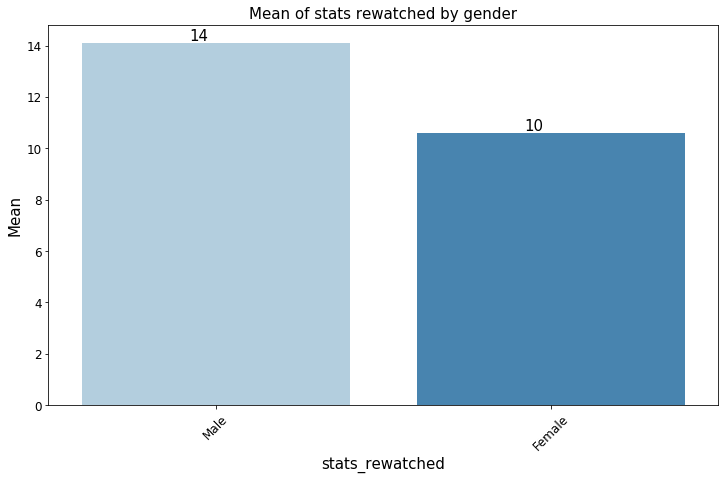

In [21]:
# Creating serie
serie = gender['stats_rewatched'].sort_values(ascending=False)

# Barplot
plot_barplot(serie,'stats_rewatched','Mean','Mean of stats rewatched by gender',dx=2.5,dy=0.1)

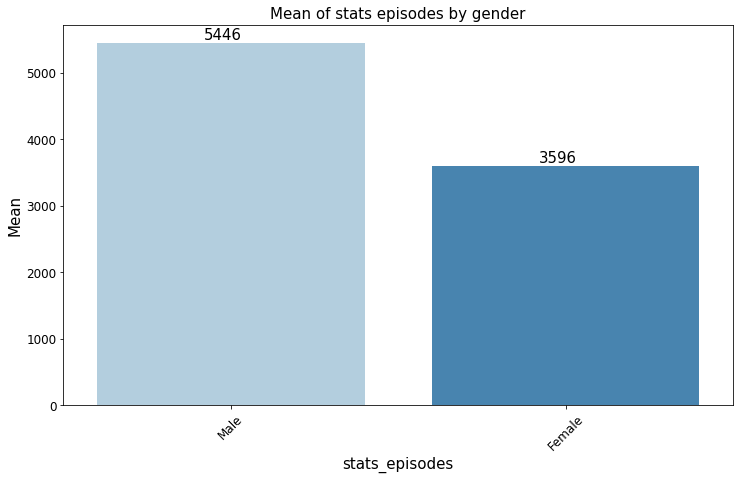

In [22]:
# Creating serie
serie = gender['stats_episodes'].sort_values(ascending=False)

# Barplot
plot_barplot(serie,'stats_episodes','Mean','Mean of stats episodes by gender',dx=2.5,dy=50)

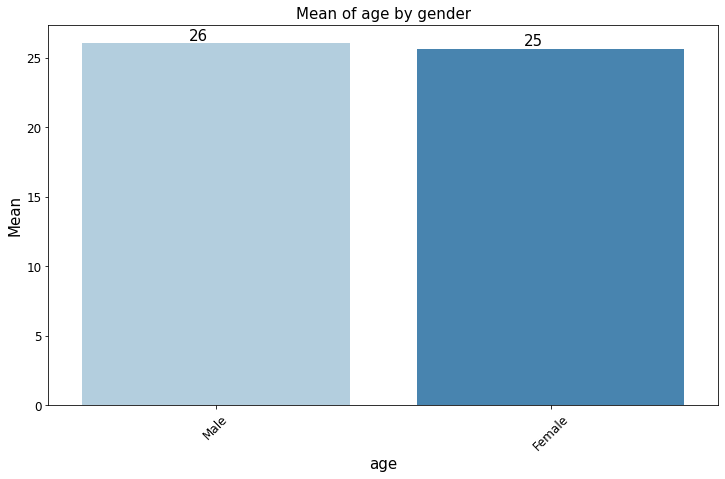

In [23]:
# Creating serie
serie = gender['age'].sort_values(ascending=False)

# Barplot
plot_barplot(serie,'age','Mean','Mean of age by gender',dx=2.5,dy=0.2)

So basicaly every attribute have values higher in male than female. But this difference it's not so big.

One interesting thing it's that mans tend to be most active users.

In [24]:
# Filter data by top 15 most populous countries and them compute mean for each column by country
countries = userList[userList['location'].isin(location.index)].groupby('location').mean()

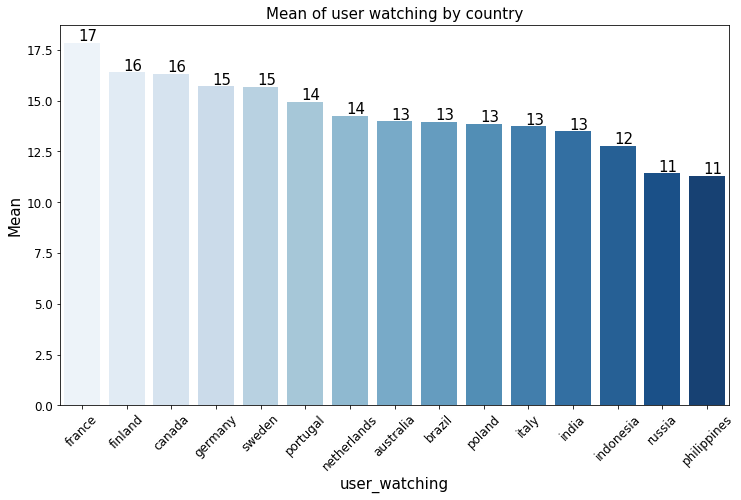

In [25]:
# Creating serie
serie = countries['user_watching'].sort_values(ascending=False)

# Barplot
plot_barplot(serie,'user_watching','Mean','Mean of user watching by country',dx=2.5,dy=0.1)

So in 15 most populous contries we don't have many difference in user_watching.

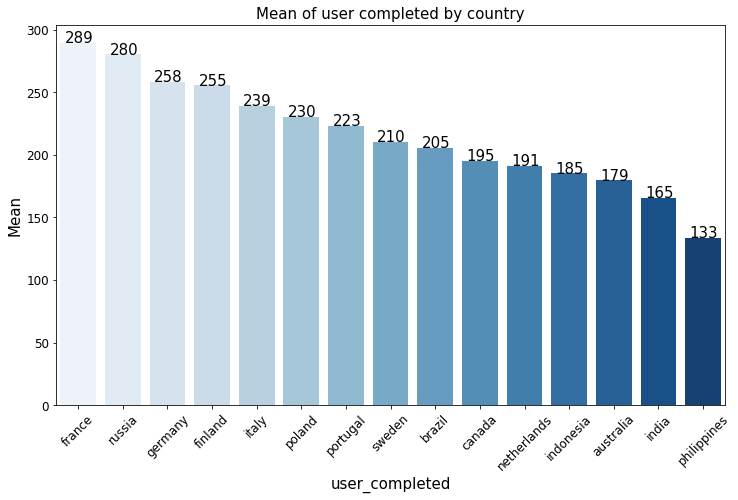

In [26]:
# Creating serie
serie = countries['user_completed'].sort_values(ascending=False)

# Barplot
plot_barplot(serie,'user_completed','Mean','Mean of user completed by country',dx=8,dy=0.1)

In graphic above you can see that we have some big differences in user_completed. Users from France, Russia and Germany have completed more animes than others countries, so your company can streaming animes for theses countries in order to achieve more profits.

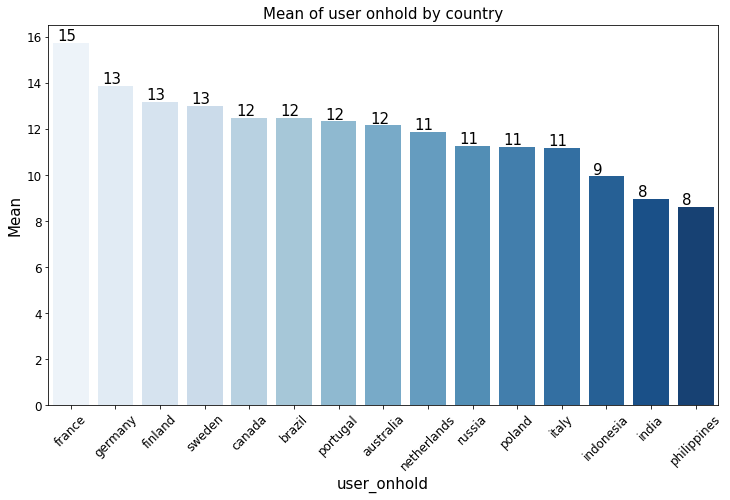

In [27]:
# Creating serie
serie = countries['user_onhold'].sort_values(ascending=False)

# Barplot
plot_barplot(serie,'user_onhold','Mean','Mean of user onhold by country',dx=8,dy=0.1)

Again France and Germany appears in good placements.

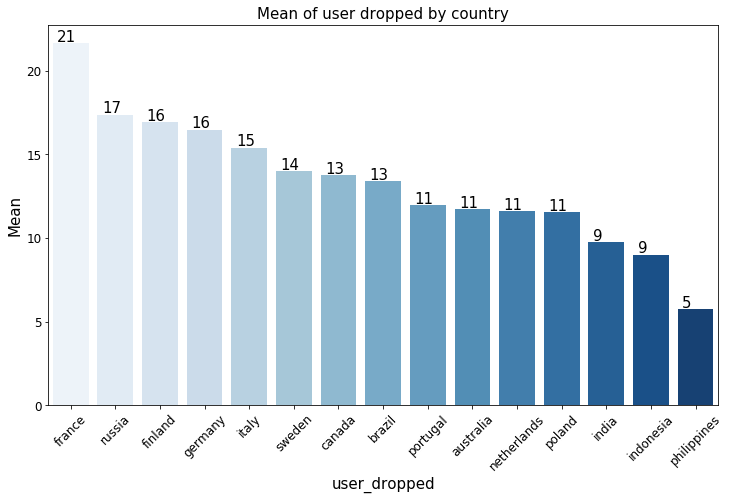

In [53]:
# Creating serie
serie = countries['user_dropped'].sort_values(ascending=False)

# Barplot
plot_barplot(serie,'user_dropped','Mean','Mean of user dropped by country',dx=8,dy=0.1)

France, Russia and Germany that are countries where we have more users completed and onhold are too where we have more dropped animes.

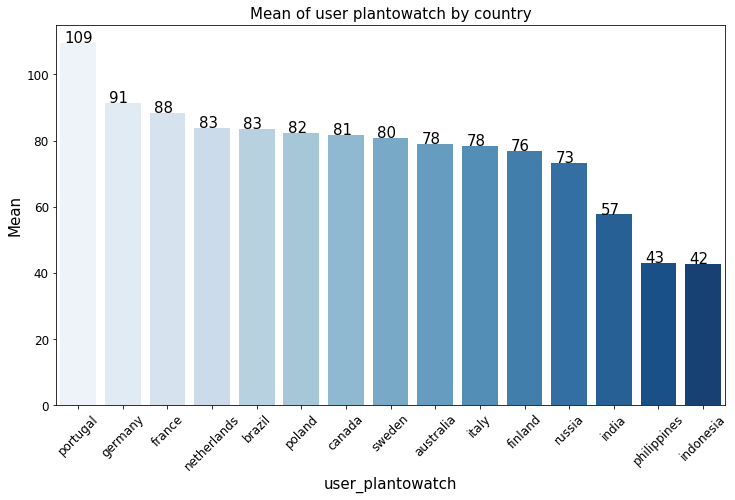

In [29]:
# Creating serie
serie = countries['user_plantowatch'].sort_values(ascending=False)

# Barplot
plot_barplot(serie,'user_plantowatch','Mean','Mean of user plantowatch by country',dx=8,dy=0.1)

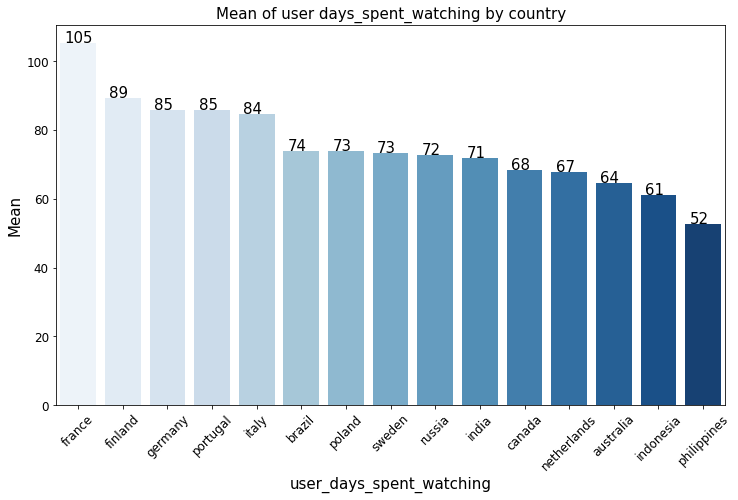

In [54]:
# Creating serie
serie = countries['user_days_spent_watching'].sort_values(ascending=False)

# Barplot
plot_barplot(serie,'user_days_spent_watching','Mean','Mean of user days_spent_watching by country',dx=8,dy=0.1)

France and Germany again in good placements.

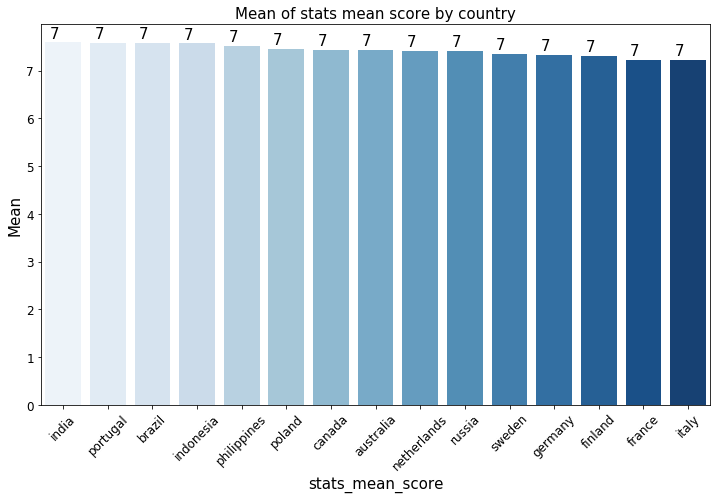

In [31]:
# Creating serie
serie = countries['stats_mean_score'].sort_values(ascending=False)

# Barplot
plot_barplot(serie,'stats_mean_score','Mean','Mean of stats mean score by country',dx=8,dy=0.1)

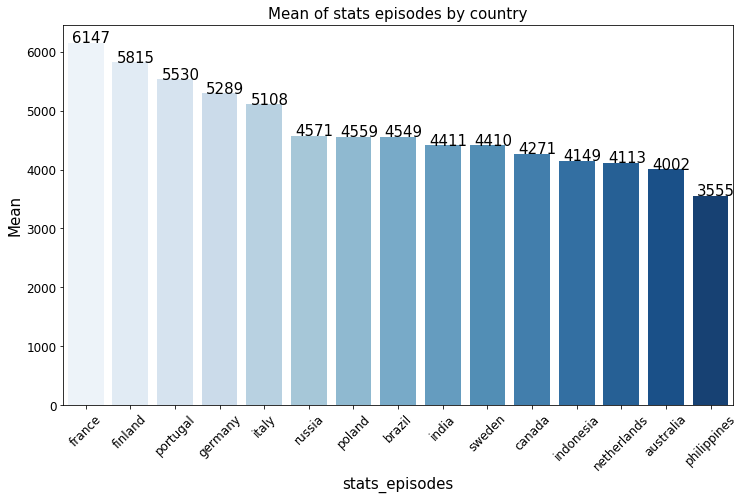

In [32]:
# Creating serie
serie = countries['stats_episodes'].sort_values(ascending=False)

# Barplot
plot_barplot(serie,'stats_episodes','Mean','Mean of stats episodes by country',dx=8,dy=0.1)

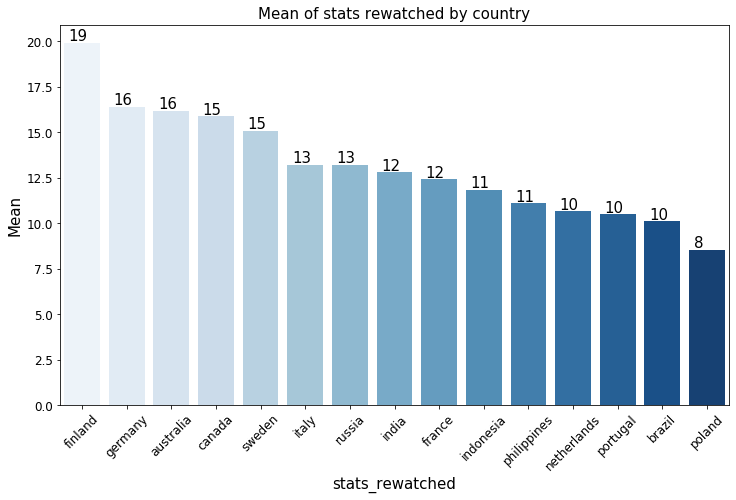

In [33]:
# Creating serie
serie = countries['stats_rewatched'].sort_values(ascending=False)

# Barplot
plot_barplot(serie,'stats_rewatched','Mean','Mean of stats rewatched by country',dx=8,dy=0.1)

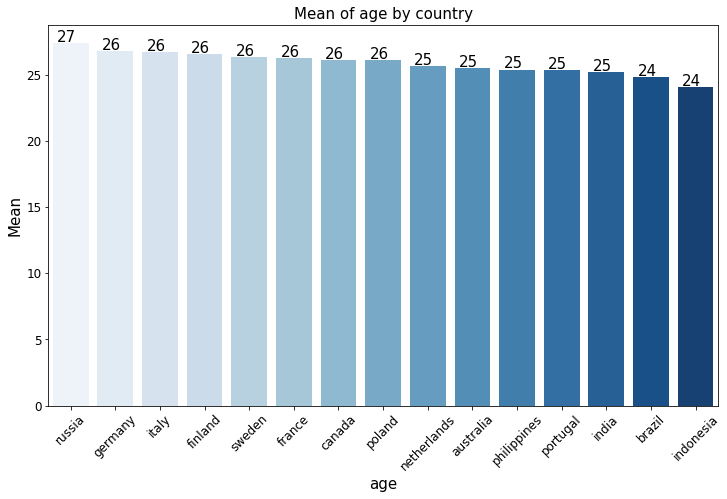

In [55]:
# Creating serie
serie = countries['age'].sort_values(ascending=False)

# Barplot
plot_barplot(serie,'age','Mean','Mean of age by country',dx=8,dy=0.1)

# Conclusion

So for our graphics we can conclude:

- Anime's users tend to be Men. So animes Shonen (for men's public) have more chance to get more views (possibly).
- Countries like France, Germany and Russia have users more active than others countries. So it's a good idea try to focus on these countries to promote an anime.
- But, France, Germany and Russia are too countries where we have users that tend to drop more animes. So you need some precaution.
- User's age it's almost equal in every country and the mean it's 26.
- We don't have big differences in attributes for gender.

# Suggestion

If you are starting a streaming service, the graphs (for now) show that the most suitable country to focus on would be Germany.

Besides being a country where it has one of the largest numbers of users watching anime, they tend to be very active users. Therefore, focusing on this country may be a good strategy.

## 1.2 AnimeList

So let's explore our data in order to find some insights.

In [62]:
# Read data
animeList = pd.read_csv('AnimeListCleaned.csv')

# Columns used for analyze
columns = ['source','rating','score','scored_by','rank','popularity','members','favorites','premiered','studio','genre']

# Filter by columns
animeList = animeList.loc[:,columns]

In [67]:
# Let's check correlation
animeList.corr()

,score,scored_by,rank,popularity,members,favorites
score,1.000000,0.450764,-0.975302,-0.594729,0.482013,0.356272
scored_by,0.450764,1.000000,-0.396650,-0.498968,0.987119,0.798656
rank,-0.975302,-0.396650,1.000000,0.602623,-0.426619,-0.270941
popularity,-0.594729,-0.498968,0.602623,1.000000,-0.550784,-0.266389
members,0.482013,0.987119,-0.426619,-0.550784,1.000000,0.791900
favorites,0.356272,0.798656,-0.270941,-0.266389,0.791900,1.000000
